In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import sys
import os

sys.path.append(os.path.relpath("../../huygens"))
sys.path.append(os.path.relpath("../../galileo"))

import galileo as gal
import huygens as huy

# Load annotations

In [2]:
merged_ccle_info = pd.read_csv("../data/supplementary/S1_merged-ccle-info.txt",sep="\t",index_col=0)

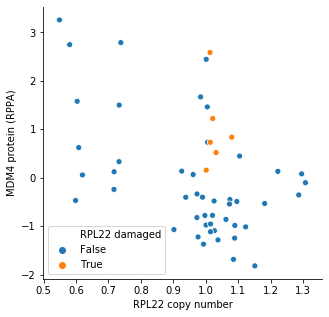

In [54]:
plt.figure(figsize=(5,5))

rpl22_mut = merged_ccle_info["RPL22_mutation_classification_collapsed"].rename(
    "RPL22 damaged").dropna() == "damaging"

ax = sns.scatterplot(merged_ccle_info["RPL22_copynumber"],
                merged_ccle_info["MDM4_MS_protein"],
                hue=rpl22_mut,
                )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel("RPL22 copy number")
plt.ylabel("MDM4 protein (RPPA)")

plt.savefig("../plots/RPL22_copynumber_MDM4_protein.pdf",bbox_inches="tight",transparent=True)

Odds ratio: 363.2758620689655
P-value: 7.846786170124578e-83


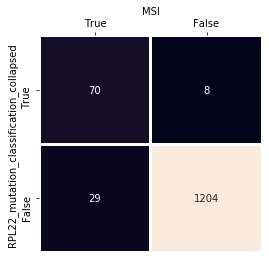

In [46]:
huy.binary_contingency(
    merged_ccle_info["RPL22_mutation_classification_collapsed"].dropna()=="damaging",
    merged_ccle_info["MSI"]
)

In [51]:
avana = pd.read_hdf("../../data/processed/depmap/avana.hdf",key="avana")
drive = pd.read_hdf("../../data/processed/depmap/demeter2-drive_v12-gene-effect.hdf",key="drive")


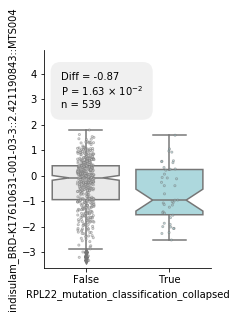

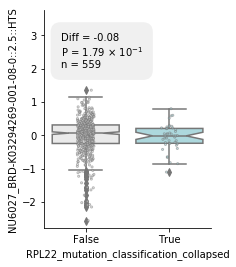

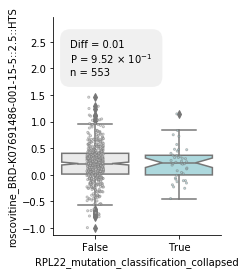

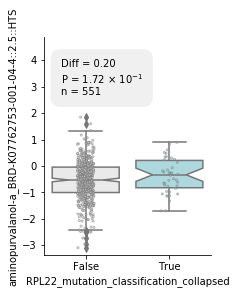

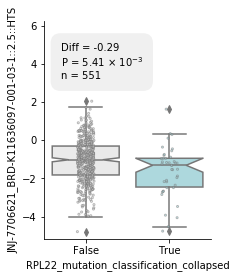

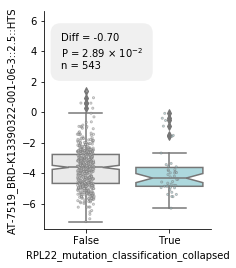

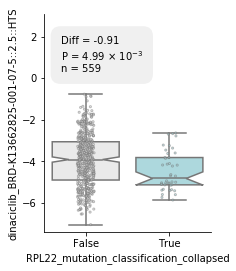

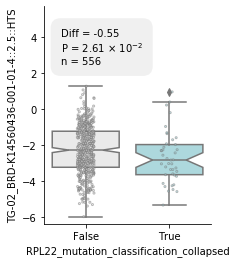

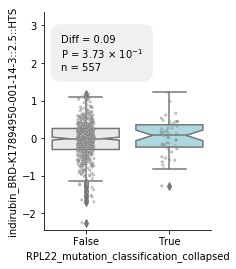

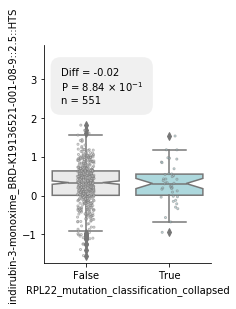

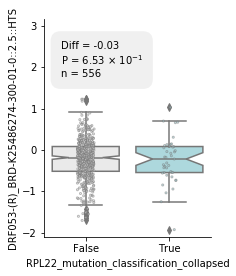

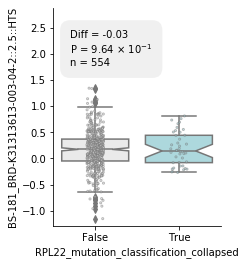

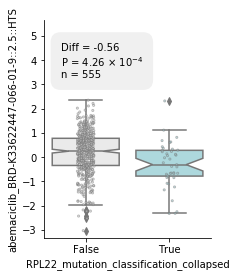

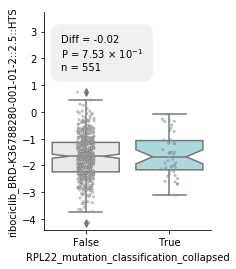

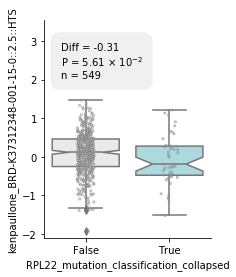

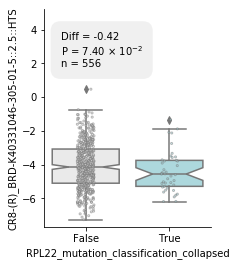

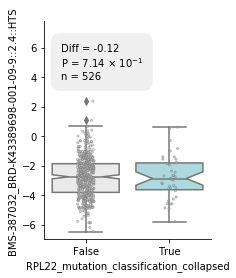

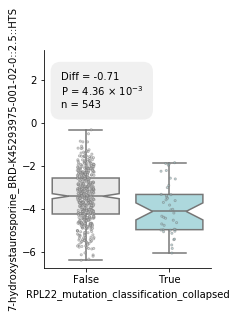

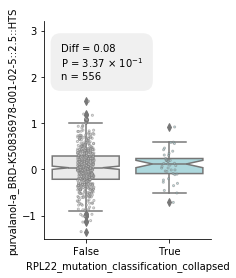

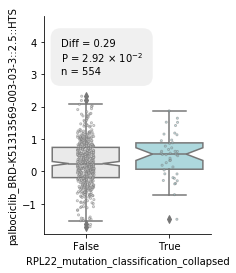

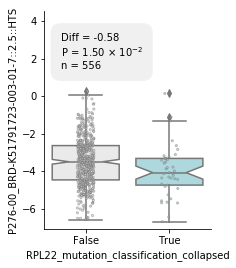

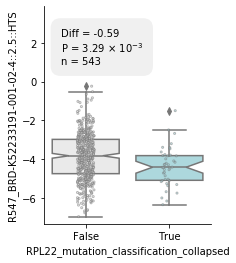

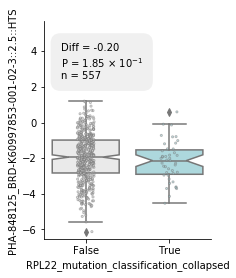

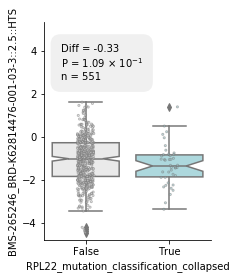

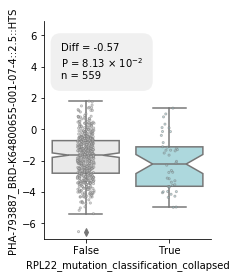

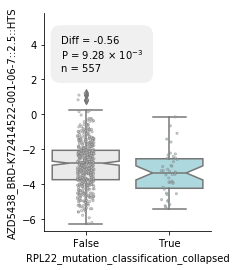

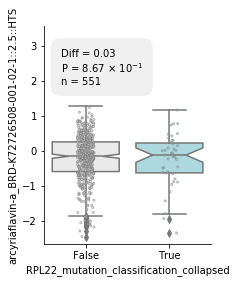

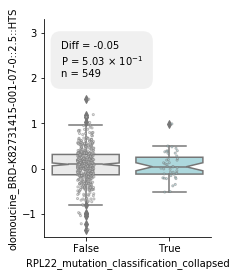

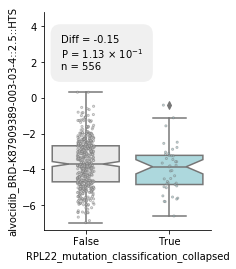

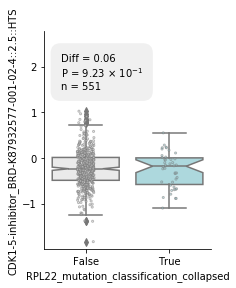

In [75]:
primary_info["format_name"] = primary_info["name"].fillna(
    "UNNAMED") + "_" + primary_info["column_name"]

cdk_inhibitors = primary_info[primary_info["moa"].apply(
    lambda x: "CDK" in str(x))]["format_name"]

for inhibitor in cdk_inhibitors:
    huy.two_dists(primary_logfold[inhibitor],
                  merged_ccle_info["RPL22_mutation_classification_collapsed"].dropna(
    ) == "damaging",
        summary_type="box"
    )

    plt.show()

In [9]:
ccle_genex = pd.read_hdf(
    "../../data/processed/ccle/CCLE_RNAseq_rsem_genes_tpm_20180929.hdf", key="ccle_genex")

ccle_transcripts = pd.read_hdf("../../data/processed/ccle/CCLE_RNAseq_rsem_transcripts_tpm_20180929.hdf",
                               key="ccle_transcripts")
exonusage = pd.read_hdf(
    "../../data/processed/ccle/CCLE_RNAseq_ExonUsageRatio_20180929.hdf", key="exonusage")

ms_prot = pd.read_hdf("../../data/processed/ccle/ms_prot.h5", key="ms_prot")
rppa = pd.read_hdf(
    "../../data/processed/ccle/CCLE_RPPA_20181003.hdf", key="rppa")

primary_logfold = pd.read_hdf(
    "../../data/processed/depmap/primary_logfold.h5", key="primary_logfold")
secondary_logfold = pd.read_hdf(
    "../../data/processed/depmap/secondary_logfold.h5", key="secondary_logfold")

In [58]:
msi = pd.read_excel("../data/external/ccle2/41586_2019_1186_MOESM10_ESM.xlsx",sheet_name="MSI calls")
msi = msi.set_index("depMapID")
msi["GDSC_msi"] = msi["GDSC.msi.call"].replace({"MSI-H":True,"MSS/MSI-L":False})
msi["CCLE_msi"] = msi["CCLE.MSI.call"].replace({"inferred-MSI":True,"inferred-MSS":False,"undetermined":np.nan})

msi = msi.dropna(subset=["GDSC_msi","CCLE_msi"],how="all")

msi["MSI"] = msi["GDSC_msi"] | msi["CCLE_msi"]
name_map = dict(zip(msi["CCLE_ID"],msi.index))
name_map["HS294T_SKIN"] = "ACH-000014"

# Compute differences

In [ ]:
msi_prot_diffs = gal.mat_mwus_naive(ms_prot,msi["MSI"],pbar=True)
msi_prot_diffs.to_csv("../data/intermediate/msi_prot_diffs.txt",sep="\t")

msi_exon_diffs = gal.mat_mwus_naive(exonusage,msi["MSI"],pbar=True,effect="mean")
msi_exon_diffs.to_csv("../data/intermediate/msi_exon_diffs.txt",sep="\t")

In [9]:
msi_info["RPL22_mutation_classification_collapsed"]

Achilles_ID
ACH-000770          WT
ACH-000782          WT
ACH-000795          WT
ACH-000811          WT
ACH-000856    damaging
                ...   
ACH-002238      silent
ACH-002256          WT
ACH-002272          WT
ACH-002275          WT
ACH-002287          WT
Name: RPL22_mutation_classification_collapsed, Length: 99, dtype: object

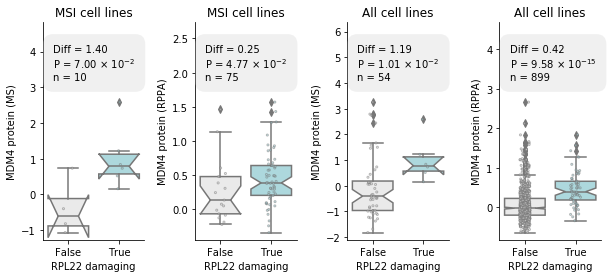

In [41]:
msi_info = merged_ccle_info[merged_ccle_info["MSI"] == True]

plt.figure(figsize=(10,4))

ax = plt.subplot(141)
huy.two_dists(
    msi_info["MDM4_MS_protein"],
    msi_info["RPL22_mutation_classification_collapsed"] == "damaging",
    ax=ax,
    summary_type="box"
)

plt.xlabel("RPL22 damaging")
plt.ylabel("MDM4 protein (MS)")
plt.title("MSI cell lines")

ax = plt.subplot(142)
huy.two_dists(
    msi_info["MDM4_RPPA_protein"],
    msi_info["RPL22_mutation_classification_collapsed"] == "damaging",
    ax=ax,
    summary_type="box"
)

plt.xlabel("RPL22 damaging")
plt.ylabel("MDM4 protein (RPPA)")
plt.title("MSI cell lines")

ax = plt.subplot(143)
huy.two_dists(
    merged_ccle_info["MDM4_MS_protein"],
    merged_ccle_info["RPL22_mutation_classification_collapsed"] == "damaging",
    ax=ax,
    summary_type="box"
)

plt.xlabel("RPL22 damaging")
plt.ylabel("MDM4 protein (MS)")
plt.title("All cell lines")

ax = plt.subplot(144)
huy.two_dists(
    merged_ccle_info["MDM4_RPPA_protein"],
    merged_ccle_info["RPL22_mutation_classification_collapsed"] == "damaging",
    ax=ax,
    summary_type="box"
)

plt.xlabel("RPL22 damaging")
plt.ylabel("MDM4 protein (RPPA)")
plt.title("All cell lines")

plt.subplots_adjust(wspace=0.5)

plt.savefig("../plots/MDM4_protein_comparisons.pdf",bbox_inches="tight",transparent=True)

# Mutations

In [3]:
msi_prot_diffs = pd.read_csv("../data/intermediate/msi_prot_diffs.txt",sep="\t")
msi_exon_diffs = pd.read_csv("../data/intermediate/msi_exon_diffs.txt",sep="\t",index_col=0)

## Storage bucket info

In [16]:
ccle_samples = pd.read_csv("../data/raw/fullccle_samples.csv")
wgs_samples = ccle_samples[ccle_samples["datatype"]=="wgs"]
wgs_samples = wgs_samples.sort_values(by=["arxspan_id","version","size"])
wgs_samples = wgs_samples.drop_duplicates(subset=["arxspan_id"],keep="first")

## Gene intervals

In [68]:
msi_exons = msi_exon_diffs.copy()[msi_exon_diffs["qval"]>=4]

msi_exons["gene"] = msi_exons.index.map(lambda x: x.split("_")[-1])
msi_exons["exon_chrom"] = msi_exons.index.map(lambda x: x.split("_")[-4][3:])
msi_exons["exon_start"] = msi_exons.index.map(lambda x: x.split("_")[-3])
msi_exons["exon_end"] = msi_exons.index.map(lambda x: x.split("_")[-2])

msi_exons["exon"] = msi_exons["exon_chrom"] + "_" + msi_exons["exon_start"] + "_" + msi_exons["exon_end"]

msi_exons["exon_start"] = msi_exons["exon_start"].astype(int)
msi_exons["exon_end"] = msi_exons["exon_end"].astype(int)

msi_exons = msi_exons.drop_duplicates(subset=["exon"])

In [69]:
def get_exon_bounds(row,padding=1000):
    
    if row["exon_start"] < row["exon_end"]:
        row["bound_start"] = row["exon_start"]-padding
        row["bound_end"] = row["exon_end"]+padding
    
    elif row["exon_start"] > row["exon_end"]:
        row["bound_start"] = row["exon_end"]-padding
        row["bound_end"] = row["exon_start"]+padding
        
    return row
    
msi_exons = msi_exons.apply(get_exon_bounds,axis=1)

In [70]:
msi_exons[["exon_chrom","bound_start","bound_end"]].to_csv("../scripts/MSI_exon_bounds.bed",sep="\t",header=False,index=False)
msi_exons[["exon_chrom","bound_start","bound_end"]].to_csv("../data/raw/MSI_exon_bounds.bed",sep="\t",header=False,index=False)

In [71]:
with open("../scripts/wgs_paths.txt","w") as f:
    for bam_path in list(wgs_samples["internal_bam_filepath"]):
        f.write(bam_path+"\n")
        
with open("../scripts/wgs_ids.txt","w") as f:
    for bam_path in list(wgs_samples["arxspan_id"]):
        f.write(bam_path+"\n")

In [72]:
with open("../scripts/7_fetch-msi-slices.sh", "w") as f:
    for bam_path, ach_id in zip(list(wgs_samples["internal_bam_filepath"]), list(wgs_samples["arxspan_id"])):

        f.write("export GCS_OAUTH_TOKEN=$(gcloud auth application-default print-access-token) && samtools view -b -h -M -L ../data/raw/MSI_exon_bounds.bed {} > ../data/raw/WGS_slices/{}.bam\n".format(bam_path, ach_id))

## Load mutations

In [25]:
msi_exon_muts = pd.read_csv("../data/intermediate/msi_exon_calls_filtered.txt",
                            sep="\t",
                            names=["chrom","pos","sample","ref","alt","genotype"]
                           )

wgs_sample_ids = pd.read_csv("../scripts/wgs_ids_samples.txt",sep="\t",names=["ach_id","sample_name","cn_bi"])
wgs_sample_map = dict(zip(wgs_sample_ids["sample_name"],wgs_sample_ids["ach_id"]))
wgs_sample_map["Detroit 562"] = "ACH-000207"

msi_exon_muts["ach_id"] = msi_exon_muts["sample"].apply(lambda x: wgs_sample_map[x])

In [28]:
msi_exon_muts["mut_site"] = msi_exon_muts["chrom"] + "_" + msi_exon_muts["pos"].astype(str)
msi_exon_muts["value"] = 1
msi_exon_mut_mat = pd.pivot_table(msi_exon_muts, values="value", index=[
                            "ach_id"], columns="mut_site", fill_value=0)